<a href="https://colab.research.google.com/github/vlasovss/ProjectEuler/blob/main/pyProjectEuler20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Eulera на Python
## Задачи с 1 по 20

---
# Задача 1. Числа, кратные 3 или 5
Если выписать все натуральные числа меньше 10, кратные 3 или 5, то получим 3, 5, 6 и 9. Сумма этих чисел равна 23.

Найдите сумму всех чисел меньше 1000, кратных 3 или 5.

[Оригинал](https://projecteuler.net/problem=1) [На русском](https://euler.jakumo.org/problems/view/1.html)

Completed on Wed, 30 Sep 2020, 12:15

 **Вариант 1.**

In [ ]:
sum_digit_mod_3_or_5 = 0
for x in range(1000):
    if x%3 == 0 or x%5 == 0:
        sum_digit_mod_3_or_5 += x
print(sum_digit_mod_3_or_5)

**Вариант 2.**

In [ ]:
print(sum([x for x in range(1000) if x%3 == 0 or x%5 == 0]))

---
# Задача 2. Четные числа Фибоначчи
Каждый следующий элемент ряда Фибоначчи получается при сложении двух предыдущих. Начиная с 1 и 2, первые 10 элементов будут:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

Найдите сумму всех четных элементов ряда Фибоначчи, которые не превышают четыре миллиона.

[Оригинал](https://projecteuler.net/problem=2) [На русском](https://euler.jakumo.org/problems/view/2.html)

Completed on Wed, 30 Sep 2020, 12:55

In [ ]:
sum_, f0, f1 = 0, 0, 1
limit = int(4e6)
while f0 < limit:
    sum_ = sum_ + f0 if f0%2 == 0 else sum_
    f0, f1 = f1, f0 + f1
print(sum_)

---
# Задача 3. Наибольший простой делитель
Простые делители числа 13195 - это 5, 7, 13 и 29.

Каков самый большой делитель числа 600851475143, являющийся простым числом?

[Оригинал](https://projecteuler.net/problem=3) [На русском](https://euler.jakumo.org/problems/view/3.html)

Completed on Wed, 30 Sep 2020, 16:18

In [ ]:
num = 600851475143
i = 2
div = None
while num > 1:
    if num % i == 0:
        div = i
        num = num // i;
    else:
        i += 1
print(div) 

---
# Задача 4. Наибольшее произведение-палиндром
Число-палиндром с обеих сторон (справа налево и слева направо) читается одинаково. Самое большое число-палиндром, полученное умножением двух двузначных чисел – 9009 = 91 × 99.

Найдите самый большой палиндром, полученный умножением двух трехзначных чисел.

[Оригинал](https://projecteuler.net/problem=4) [На русском](https://euler.jakumo.org/problems/view/4.html)

Completed on Thu, 1 Oct 2020, 07:51

**Вариант 1.**

In [ ]:
def is_palindrome(n):
    return str(n) == str(n)[::-1]


max_palindrome = 0
for i in range(100, 1000):
    for j in range(100, 1000):
        tmp = i * j
        if is_palindrome(tmp) and tmp > max_palindrome:
            max_palindrome = tmp 

print(max_palindrome)

**Вариант 2.** Лаконичный и красивый.

In [ ]:
max_palindrome = max(i * j
                     for i in range(100, 1000)
	                 for j in range(100, 1000)
	                 if str(i * j) == str(i * j)[::-1])
print(max_palindrome)

**Подзадача.** Найти делители палиндрома 

In [ ]:
import math


def get_dividers(palindrome):
    return [(i, palindrome // i) for i in range(1, int(math.sqrt(palindrome)) + 1) if palindrome % i == 0]


get_dividers(max_palindrome)

**Подзадача.** Разложить палиндром на простые множители (факторизация).

In [ ]:
def get_multipliers(n):
    i = 2
    result = [1]
    while n != 1:
        if n % i == 0:
            n = n // i
            result += [i]
        else:
            i += 1
    
    return result


print(get_multipliers(max_palindrome))

---
# Задача 5. Наименьшее кратное
2520 - самое маленькое число, которое делится без остатка на все числа от 1 до 10.

Какое самое маленькое число делится нацело на все числа от 1 до 20?

[Оригинал](https://projecteuler.net/problem=5) [На русском](https://euler.jakumo.org/problems/view/5.html)

Completed on Thu, 1 Oct 2020, 20:06

**Вариант 1.**

In [ ]:
from functools import reduce

mults_count = {}
tmp_mults_count = {}
for i in range(2, 21):
    mults = get_multipliers(i)
    tmp_mults_count.clear()
    
    for m in mults:
        if tmp_mults_count.setdefault(m, 0) != None:
            tmp_mults_count[m] += 1
    
    for m, k in tmp_mults_count.items():
        if mults_count.setdefault(m, 0) != None:
            if mults_count[m] < tmp_mults_count[m]:
                mults_count[m] = k
lcm = reduce(lambda x, y: x * y, [m ** k  for m, k in mults_count.items()])
print(lcm)

**Вариант 1.1**

In [ ]:
from collections import Counter
from functools import reduce
from numpy import multiply

mults_count = Counter()
tmp_mults_count = Counter()
for i in range(2, 21):
    mults = get_multipliers(i)
    tmp_mults_count.clear()

    for m in mults:
        tmp_mults_count[m] += 1
    
    mults_count |= tmp_mults_count
#lcm = reduce(lambda x, y: x * y, [m ** k  for m, k in mults_count.items()])
lcm = multiply.reduce([m ** k  for m, k in mults_count.items()])
print(lcm)

**Вариант 2.** Если известен наибольший общий делитель, можно использовать его связь с HOK:

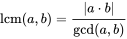

In [ ]:
from numpy import gcd

a = 1
for b in range(1, 21):
    a *= b // gcd(a, b)

print(a)

**Вариант 3.**

In [ ]:
from numpy import lcm, arange

arr = arange(1, 21)
print(lcm.reduce(arr))

---
# Задача 6. Разность между суммой квадратов и квадратом суммы 
Сумма квадратов первых десяти натуральных чисел равна
> 12 + 22 + ... + 102 = 385

Квадрат суммы первых десяти натуральных чисел равен

>(1 + 2 + ... + 10)2 = 552 = 3025

Следовательно, разность между суммой квадратов и квадратом суммы первых десяти натуральных чисел составляет 
>3025 − 385 = 2640.

Найдите разность между суммой квадратов и квадратом суммы первых ста натуральных чисел.

[Оригинал](https://projecteuler.net/problem=6) [На русском](https://euler.jakumo.org/problems/view/6.html)

Completed on Thu, 1 Oct 2020, 23:35

**Вариант 1.**

In [ ]:
sum(i for i in range(1, 101)) ** 2 - sum(i ** 2 for i in range(1, 101))

**Вариант 2.**

>1, 2, 3, 4, 5, ..., 17, 18, 19, 20 - арифметическая прогрессия

**Арифметическая прогрессия** — числовая последовательность вида

>2.png

Сумма первых *n* членов арифметической прогрессии 
>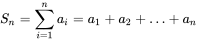 

может быть найдена по формулам
>a173854d032a294f44e64bfb385a7e8ac1f9452a.png, где
bbf42ecda092975c9c69dae84e16182ba5fe2e07.png — первый член прогрессии, 790f9209748c2dca7ed7b81932c37c02af1dbc31.png — член с номером a601995d55609f2d9f5e233e36fbe9ea26011b3b.png, a601995d55609f2d9f5e233e36fbe9ea26011b3b.png — количество суммируемых членов.

>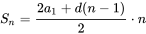
, где bbf42ecda092975c9c69dae84e16182ba5fe2e07.png — первый член прогрессии, e85ff03cbe0c7341af6b982e47e9f90d235c66ab.png — разность прогрессии, a601995d55609f2d9f5e233e36fbe9ea26011b3b.png — количество суммируемых членов.

Квадрат суммы первых *n* натуральных чисел равен
>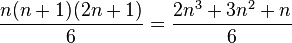

In [ ]:
n = 100
s1 = ((1 + n)/2 * n) ** 2
s2 = (2*n + 1) * (n + 1) * n/6
print(s1 - s2)

---
# Задача 7. 10001-ое простое число
Выписав первые шесть простых чисел, получим 2, 3, 5, 7, 11 и 13. Очевидно, что 6-ое простое число - 13.

Какое число является 10001-ым простым числом?

[Оригинал](https://projecteuler.net/problem=7) [На русском](https://euler.jakumo.org/problems/view/7.html)

Completed on Sat, 3 Oct 2020, 00:08

In [ ]:
from math import sqrt


def is_prime(n):
    if n % 2 == 0 and n > 2: 
        return False
    return all(n % i for i in range(3, int(sqrt(n)) + 1, 2))


def is_prime(n):
    if n % 2 == 0:
        return n == 2
    d = 3
    while d * d <= n and n % d != 0:
        d += 2
    return d * d > n


count = 1
i = 1
while count < 10001:
    i += 2
    count += 1 if is_prime(i) else 0
print(i)

---
# Задача 8. Наибольшее произведение в последовательности
Наибольшее произведение четырех последовательных цифр в нижеприведенном 1000-значном числе равно 9 × 9 × 8 × 9 = 5832.

>См. файл sample_data/p008_1000digit_num.txt

Найдите наибольшее произведение тринадцати последовательных цифр в данном числе.

[Оригинал](https://projecteuler.net/problem=8) [На русском](https://euler.jakumo.org/problems/view/8.html)

Completed on Sat, 3 Oct 2020, 00:51

In [ ]:
from numpy import multiply

with open('/content/drive/My Drive/ProjectEuler/sample_data/p008_1000digit_num.txt') as f:
    BIG_INT = f.read()

max(multiply.reduce([int(digit) for digit in BIG_INT[j:j + 13]]) 
    for j in range(len(BIG_INT) - 12))

---
# Задача 9. Особая тройка Пифагора
Тройка Пифагора - три натуральных числа a < b < c, для которых выполняется равенство

>a^2 + b^2 = c^2

Например, 3^2 + 4^2 = 9 + 16 = 25 = 5^2.

Существует только одна тройка Пифагора, для которой a + b + c = 1000.

Найдите произведение abc.

[Оригинал](https://projecteuler.net/problem=9) [На русском](https://euler.jakumo.org/problems/view/9.html)

Completed on Sat, 3 Oct 2020, 15:19

**Вариант 1.** Красивый, но медленный.

In [ ]:
С = 1000
[(a, b, С - a - b, (С - a - b)*a*b) 
    for a in range(1, С + 1)
    for b in range(a + 1, С + 1)
    if (С-a-b) ** 2 == a**2 + b**2]

**Вариант 2.** С просторов рунета (стандартный, но быстрый).

In [ ]:
def compute():
    PERIMETER = 1000
    for a in range(1, PERIMETER + 1):
        for b in range(a + 1, PERIMETER + 1):
            c = PERIMETER - a - b
            if a*a + b*b == c*c:
                return str(a * b * c)

compute()

---
# Задача 10. Сложение простых чисел
Сумма простых чисел меньше 10 равна 2 + 3 + 5 + 7 = 17.

Найдите сумму всех простых чисел меньше двух миллионов.

[Оригинал](https://projecteuler.net/problem=10) [На русском](https://euler.jakumo.org/problems/view/10.html)

Completed on Sat, 3 Oct 2020, 16:28

**Вариант 1.**

In [ ]:
def is_prime(n):
    if n % 2 == 0:
        return n == 2
    d = 3
    while d * d <= n and n % d != 0:
        d += 2
    return d * d > n
    

print(sum(i for i in range(3, 2*10**6, 2) if is_prime(i)) + 2)

**Вариант 2.**

In [ ]:
sum_ = 2
for i in range(3, 2*10**6, 2):
    if is_prime(i):
        sum_ += i
print(sum_)

---
# Задача 11. Наибольшее произведение в таблице
В таблице 20×20 

>См. файл sample_data/p011_matrix.txt

четыре числа на одной диагонали выделены красным.

Произведение этих чисел 26 × 63 × 78 × 14 = 1788696.

Каково наибольшее произведение четырех подряд идущих чисел в таблице 20×20, расположенных в любом направлении (вверх, вниз, вправо, влево или по диагонали)?

[Оригинал](https://projecteuler.net/problem=11) [На русском](https://euler.jakumo.org/problems/view/11.html)

Completed on Mon, 5 Oct 2020, 22:47

In [ ]:
import numpy as np

with open('/content/drive/My Drive/ProjectEuler/sample_data/p011_matrix.txt') as f:
    matrix = np.array([int(i) 
                       for line in f
                       for i in line.split()]).reshape(20, 20)

max_global = 0
for i in range(0, 17):
    for j in range(0, 17):
        mini_matrix = matrix[i:i + 4, j: j + 4]
        max_mini = max([np.multiply.reduce(mini_matrix[i]) for i in range(4)] +
                       [np.multiply.reduce(mini_matrix[:, j]) for j in range(4)] +
                       [np.multiply.reduce(np.diag(mini_matrix))] + 
                       [np.multiply.reduce(np.diag(np.fliplr(mini_matrix)))])
        max_global = max(max_global, max_mini)
print(max_global)

---
# Задача 12. Треугольное число с большим количеством делителей
Последовательность треугольных чисел образуется путем сложения натуральных чисел. К примеру, 7-ое треугольное число равно 1 + 2 + 3 + 4 + 5 + 6 + 7 = 28. Первые десять треугольных чисел:

>1, 3, 6, 10, 15, 21, 28, 36, 45, 55, ...

Перечислим делители первых семи треугольных чисел:

 1: 1

 3: 1, 3

 6: 1, 2, 3, 6

10: 1, 2, 5, 10

15: 1, 3, 5, 15

21: 1, 3, 7, 21

28: 1, 2, 4, 7, 14, 28

Как мы видим, 28 - первое треугольное число, у которого более пяти делителей.

Каково первое треугольное число, у которого более пятисот делителей?

[Оригинал](https://projecteuler.net/problem=12) [На русском](https://euler.jakumo.org/problems/view/12.html)

Completed on Mon, 5 Oct 2020, 23:21

In [ ]:
import math


def get_dividers(n):
    return [(i, n // i) for i in range(1, int(math.sqrt(n)) + 1) if n % i == 0]


count_div = 0
n = 1
Tn = 0
while count_div < 500:
    Tn = n*(n + 1) / 2
    count_div = len(get_dividers(Tn)) * 2
    n += 1

print(int(Tn))

---
# Задача 13. Большая сумма
Найдите первые десять цифр суммы следующих ста 50-значных чисел.

>См. файл sample_data/p013_50digit_nums.txt

[Оригинал](https://projecteuler.net/problem=13) [На русском](https://euler.jakumo.org/problems/view/13.html)

Completed on Tue, 6 Oct 2020, 08:40

In [ ]:
with open('/content/drive/My Drive/ProjectEuler/sample_data/p013_50digit_nums.txt') as f:
    print(str(sum([int(line) for line in f]))[:10])

---
# Задача 14. Самая длинная последовательность Коллатца
Следующая повторяющаяся последовательность определена для множества натуральных чисел:

>n → n/2 (n - четное)

>n → 3n + 1 (n - нечетное)

Используя описанное выше правило и начиная с 13, сгенерируется следующая последовательность:

>13 → 40 → 20 → 10 → 5 → 16 → 8 → 4 → 2 → 1

Получившаяся последовательность (начиная с 13 и заканчивая 1) содержит 10 элементов. Хотя это до сих пор и не доказано (проблема Коллатца (Collatz)), предполагается, что все сгенерированные таким образом последовательности оканчиваются на 1.

Какой начальный элемент меньше миллиона генерирует самую длинную последовательность?

**Примечание:** Следующие за первым элементы последовательности могут быть больше миллиона.

[Оригинал](https://projecteuler.net/problem=14) [На русском](https://euler.jakumo.org/problems/view/14.html)

Completed on Tue, 6 Oct 2020, 13:26

In [ ]:
def len_seq_collatz(n):
    length = 1
    while n > 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3*n +1
        length += 1
    return length
    
    
ans = 0
max_len = 0
for n in range(10**6 - 1, 0, -1):
    cur_len = len_seq_collatz(n)
    ans = n if max_len < cur_len else ans
    max_len = max(max_len, cur_len)

print(ans)
#print(max_len)

---
# Задача 15. Пути через таблицу
Начиная в левом верхнем углу сетки 2×2 и имея возможность двигаться только вниз или вправо, существует ровно 6 маршрутов до правого нижнего угла сетки.

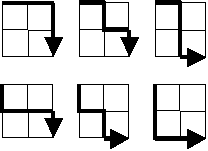

Сколько существует таких маршрутов в сетке 20×20?

[Материалы](https://informatics.mccme.ru/mod/book/view.php?id=266&chapterid=57) для решения.

[Оригинал](https://projecteuler.net/problem=15) [На русском](https://euler.jakumo.org/problems/view/15.html)

Completed on Thu, 8 Oct 2020, 19:38

**Варивнт 1.**
С иcпользованием двумерного массива.

In [ ]:
import numpy as np

size = 20
m = n = size + 1
ways = np.ones((m, n))
for i in range(1, m):
    for j in range(1, n):
        ways[i, j] = ways[i - 1, j] + ways[i, j - 1]

#print(ways)
ways[size, size]

**Вариант 2.**
С иcпользованием одномерного массива.

In [ ]:
import numpy as np

size = 20
ways = np.ones(size + 1)
for i in range(1, size + 1):
    for j in range(1, size + 1):
        ways[j] = ways[j - 1] + ways[j]
#print(ways)
ways[size]

**Вариант 3.** Через рекурсию с кэшированием (с просторов рунета).

In [ ]:
memory = {(0, 1): 1, (1, 0): 1}
 
 
def func(x, y):
    if (x, y) not in memory:
        if x == 0:
            memory[(x, y)] = func(x, y - 1)
        elif y == 0:
            memory[(x, y)] = func(x - 1, y)
        else:
            memory[(x, y)] = func(x - 1, y) + func(x, y - 1)
    return memory[(x, y)]
 
 
#print(func(2, 2))
#print(memory)
print(func(20, 20))
#print(memory)

---
# Задача 16. Сумма цифр степени
2^15 = 32768, сумма цифр этого числа равна 3 + 2 + 7 + 6 + 8 = 26.

Какова сумма цифр числа 2^1000?

[Оригинал](https://projecteuler.net/problem=16) [На русском](https://euler.jakumo.org/problems/view/16.html)

Completed on Thu, 8 Oct 2020, 20:34

In [ ]:
sum(int(i) for i in str(2**1000))

---
# Задача 17. Счет букв в числительных
Если записать числа от 1 до 5 английскими словами (one, two, three, four, five), то используется всего 3 + 3 + 5 + 4 + 4 = 19 букв.

Сколько букв понадобится для записи всех чисел от 1 до 1000 (one thousand) включительно?

>См. файл sample_data/p017_1000_nums_eng.csv

**Примечание:** Не считайте пробелы и дефисы. Например, число 342 (three hundred and forty-two) состоит из 23 букв, число 115 (one hundred and fifteen) - из 20 букв. Использование "and" при записи чисел соответствует правилам британского английского.

[Оригинал](https://projecteuler.net/problem=17) [На русском](https://euler.jakumo.org/problems/view/17.html)

Completed on Thu, 8 Oct 2020, 22:10

In [ ]:
import csv
import string

count_chars = -8
tt = str.maketrans(dict.fromkeys(string.punctuation + ' '))
with open('/content/drive/My Drive/ProjectEuler/sample_data/p017_1000_nums_eng.csv') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        count_chars += len(row[1].translate(tt))

print(count_chars)

---
# Задача 18. Максимальная сумма пути I
Начиная в вершине треугольника (см. пример ниже) и перемещаясь вниз на смежные числа, максимальная сумма до основания составляет 23.

```
   3
  7 4
 2 4 6
8 5 9 3
```
То есть, 3 + 7 + 4 + 9 = 23.

Найдите максимальную сумму пути от вершины до основания следующего треугольника:
```
              75
             95 64
            17 47 82
           18 35 87 10
          20 04 82 47 65
         19 01 23 75 03 34
        88 02 77 73 07 63 67
       99 65 04 28 06 16 70 92
      41 41 26 56 83 40 80 70 33
     41 48 72 33 47 32 37 16 94 29
    53 71 44 65 25 43 91 52 97 51 14
   70 11 33 28 77 73 17 78 39 68 17 57
  91 71 52 38 17 14 91 43 58 50 27 29 48
 63 66 04 68 89 53 67 30 73 16 69 87 40 31
04 62 98 27 23 09 70 98 73 93 38 53 60 04 23
```

>См. файл sample_data/p018_lower_triangular_matrix.txt

**Примечание:** Так как в данном треугольнике всего 16384 возможных маршрута от вершины до основания, эту задачу можно решить проверяя каждый из маршрутов. Однако похожая Задача 67 с треугольником, состоящим из сотни строк, не решается перебором (brute force) и требует более умного подхода! ;o)

[Оригинал](https://projecteuler.net/problem=18) [На русском](https://euler.jakumo.org/problems/view/18.html)

Completed on Fri, 9 Oct 2020, 23:29

In [ ]:
import numpy as np

size_matrix = 15
lower_triangular_matrix = np.zeros((size_matrix, size_matrix))

with open('/content/drive/My Drive/ProjectEuler/sample_data/p018_lower_triangular_matrix.txt') as f:
    i = 0
    for line in f:
        j = 0
        for num in line.split():
            lower_triangular_matrix[i, j] = int(num)
            j += 1
        i += 1

for i in range(size_matrix - 2, -1, -1):
    for j in range(i + 1):
        lower_triangular_matrix[i, j] += max(lower_triangular_matrix[i + 1, j], lower_triangular_matrix[i + 1, j + 1])

print(lower_triangular_matrix[0, 0])

---
# Задача 19. Считаем воскресенья

Дана следующая информация (однако, вы можете проверить ее самостоятельно):

* 1 января 1900 года - понедельник.
* В апреле, июне, сентябре и ноябре 30 дней.
* В феврале 28 дней, в високосный год - 29.
* В остальных месяцах по 31 дню.
* Високосный год - любой год, делящийся нацело на 4, однако последний год века (ХХ00) является високосным в том и только том случае, если делится на 400.

Сколько воскресений выпадает на первое число месяца в двадцатом веке (с 1 января 1901 года до 31 декабря 2000 года)?

[Оригинал](https://projecteuler.net/problem=19) [На русском](https://euler.jakumo.org/problems/view/19.html)

Completed on Sun, 11 Oct 2020, 11:31

**Вариант 1.**

In [ ]:
import numpy as np
from functools import reduce

COUNT_DAYS = {
    1: 31,
    2: 28,
    3: 31,
    4: 30,
    5: 31,
    6: 30,
    7: 31,
    8: 31,
    9: 30,
    10: 31,
    11: 30,
    12: 31,
}


def is_leap(year):
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)


def get_calendar(begin_year, year):
    COUNT_DAYS[2] = 29 if is_leap(year) else 28
    count_days = reduce(lambda a, b: a + b, COUNT_DAYS.values())
    m = count_days//7 + 2
    n = 7
    matrix_days = np.zeros((m, n))
    i = 0
    j = begin_year - 1
    for days in COUNT_DAYS.values():
        for d in range(1, days + 1):
            if j == 7:
                i += 1
                j = 0
            matrix_days[i, j] = d
            j += 1
    
    return matrix_days


def end_year(calendar):
    length = len(calendar)
    if any(calendar[length - 1]):
        return np.sum(calendar[length - 1] != 0)
    else:
        return np.sum(calendar[length - 2] != 0)


def count_sundays(calendar):
    return np.sum(calendar[:, 6] == 1)


begin_year = end_year(get_calendar(1, 1900)) + 1
count_sun = 0
for year in range(1901, 2001, 1):
    calendar = get_calendar(begin_year, year)
    count_sun += count_sundays(calendar)
    begin_year = end_year(calendar) + 1

print(count_sun)

**Варинат 2.** С просторов интернета.

In [ ]:
from datetime import date
from collections import Counter

Counter([date(y, m, 1).weekday() for y in range(1901, 2000+1) for m in range(1, 12+1)])[6]

**Варинат 3**. С просторов интернета.

In [ ]:
import datetime as dt

sum(1 for i in range(12*100) if dt.date(1901 + i//12, 1 + i%12, 1).weekday() == 6)

**Варинат 4**. С просторов интернета.

In [ ]:
import pandas as pd

(pd.date_range('1901-01', '2000-12', freq='MS').weekday == 6).sum()

---
# Задача 20. Сумма цифр факториала

n! означает n × (n − 1) × ... × 3 × 2 × 1

Например, 10! = 10 × 9 × ... × 3 × 2 × 1 = 3628800,
и сумма цифр в числе 10! равна 3 + 6 + 2 + 8 + 8 + 0 + 0 = 27.

Найдите сумму цифр в числе 100!.

[Оригинал](https://projecteuler.net/problem=20) [На русском](https://euler.jakumo.org/problems/view/20.html)

Completed on Sun, 11 Oct 2020, 21:04

In [ ]:
from math import factorial

sum([int(i) for i in str(factorial(100))])